In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [17]:
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure
from sklearn.neighbors import KNeighborsClassifier


#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model = KNeighborsClassifier()
params_NB = {'n_neighbors':[2,3,4,5,6,7,8]}
grid = GridSearchCV(estimator=model, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
grid.fit(x_train, y_train)

#print("parameters",grid.best_params_)
#print("Accuracy :",grid.best_score_)
grid.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

0.9023715415019762

In [18]:
grid.best_params_

{'n_neighbors': 7}

In [ ]:
#{'n_neighbors': 7}
#accuracy 0.9023715415019762

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
print(model.fit(x,y))

KNeighborsClassifier(n_neighbors=7)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [21]:
y_pred=model.predict(x_test)
y_pred

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 2, 4, 4, 4, 1, 2, 1, 1,
       2, 4, 2, 2, 2, 3, 3, 3, 2, 4, 2, 4, 4, 4, 2, 3, 1, 4, 3, 1, 2, 4,
       1], dtype=int64)

In [22]:

accuracy_score(y_pred,y_test) #accuracy

0.9333333333333333

In [23]:
from sklearn.metrics import accuracy_score
print("accuracy is:{0:.2f}%".format(accuracy_score(y_test,y_pred)*100))


accuracy is:93.33%


In [24]:
#model.predict_proba(x_test)

In [25]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 2, 4, 4, 4, 1, 2, 1, 1,
       2, 4, 2, 2, 2, 3, 3, 3, 2, 4, 2, 4, 4, 4, 2, 3, 1, 4, 3, 1, 2, 4,
       1], dtype=int64)

In [26]:
y_test

array([1, 1, 1, 1, 1, 3, 1, 1, 2, 4, 3, 2, 1, 2, 2, 4, 4, 3, 1, 2, 1, 1,
       2, 4, 2, 2, 2, 3, 3, 3, 2, 4, 2, 4, 4, 4, 2, 3, 1, 4, 3, 1, 2, 4,
       1], dtype=int64)

<AxesSubplot:>

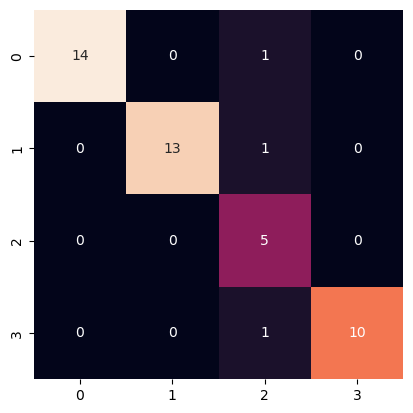

In [27]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.93      1.00      0.96        13
           3       1.00      0.62      0.77         8
           4       0.91      1.00      0.95        10

    accuracy                           0.93        45
   macro avg       0.94      0.91      0.91        45
weighted avg       0.94      0.93      0.93        45



In [ ]:
#training and validation accuracy

In [29]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 90.667 (2.000)


In [31]:
#Test Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.93      1.00      0.96        13
           3       1.00      0.62      0.77         8
           4       0.91      1.00      0.95        10

    accuracy                           0.93        45
   macro avg       0.94      0.91      0.91        45
weighted avg       0.94      0.93      0.93        45



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }






result = cross_validation(model, x_train,y_train, 5)
print(result)



{'Training Accuracy scores': array([0.9047619 , 0.94047619, 0.91666667, 0.91666667, 0.94047619]), 'Validation Accuracy scores': array([0.95238095, 0.76190476, 0.95238095, 0.95238095, 0.80952381]), 'Training Precision scores': array([0.91233766, 0.94375   , 0.92363636, 0.92363636, 0.94739057]), 'Validation Precision scores': array([0.96875   , 0.78869048, 0.95833333, 0.95833333, 0.83333333]), 'Training Recall scores': array([0.91666667, 0.94446078, 0.92875   , 0.92875   , 0.94270833]), 'Validation Recall scores': array([0.9375    , 0.79166667, 0.95833333, 0.95833333, 0.83333333]), 'Training F1 scores': array([0.91226287, 0.94312689, 0.92453207, 0.92453207, 0.94130014]), 'Validation F1 scores': array([0.94761905, 0.78111888, 0.95454545, 0.95454545, 0.83333333]), 'Mean Training Accuracy': 92.38095238095238, 'Mean Validation Accuracy': 88.57142857142856, 'Mean Training Precision': 0.9301501924001924, 'Mean Validation Precision': 0.9014880952380953, 'Mean Training Recall': 0.932267156862745

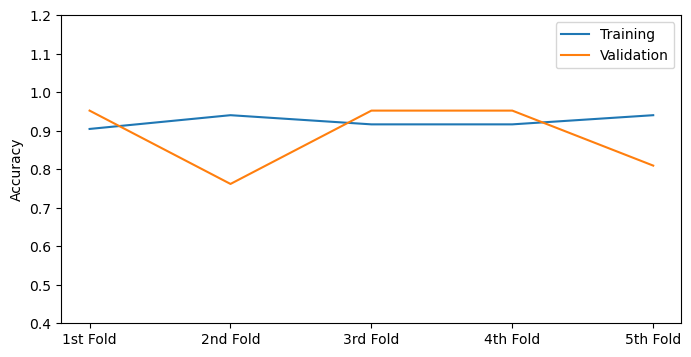

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.0s finished


{'n_neighbors': 4}

In [129]:
grid.best_score_

0.7739130434782608

In [132]:
#y_pred=grid.predict(x_test)
#print(classification_report(y_test,y_pred))

In [133]:
#model.fit(x_train, y_train)
#y_pred=model.predict(x_test)
#print(classification_report(y_test,y_pred))